# Comprehensive Analysis and Trend Evaluation of Medical Device Recalls

## Dataset merging and cleaning notebook

### Hunter Belous, Jared Fox, Asad Kamal

In [1]:
!pip install geopandas matplotlib
# import the necessary packages
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 53.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 120.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 163.9 MB/s eta 0:00:00


In [2]:
# Load the datasets.

events_df = pd.read_csv(r'events-1681209680.csv', low_memory=False)
devices_df = pd.read_csv(r'devices-1681209661.csv', low_memory=False)
manufacturers_df = pd.read_csv(r'manufacturers-1681209657.csv', low_memory=False)

In [3]:
# Check to see if datasets loaded correctly.

print(events_df.head())
print(devices_df.head())
print(manufacturers_df.head())

   id action action_classification action_level action_summary  \
0   1    NaN                   NaN          NaN         Recall   
1   2    NaN                   NaN          NaN         Recall   
2   3    NaN                   NaN          NaN         Recall   
3   4    NaN                   NaN          NaN         Recall   
4   5    NaN                   NaN          NaN         Recall   

            authorities_link country create_date data_notes        date  ...  \
0  https://www.titck.gov.tr/     TUR         NaN        NaN  2016-04-04  ...   
1  https://www.titck.gov.tr/     TUR         NaN        NaN  2016-09-20  ...   
2  https://www.titck.gov.tr/     TUR         NaN        NaN  2016-05-09  ...   
3  https://www.titck.gov.tr/     TUR         NaN        NaN  2016-12-19  ...   
4  https://www.titck.gov.tr/     TUR         NaN        NaN  2017-02-20  ...   

  status target_audience                 type  \
0    NaN             NaN  Field Safety Notice   
1    NaN             NaN

In [4]:
# Find common key in each dataset to merge on.

print("Events Dataset Columns:", events_df.columns.tolist())
print("Devices Dataset Columns:", devices_df.columns.tolist())
print("Manufacturers Dataset Columns:", manufacturers_df.columns.tolist())

Events Dataset Columns: ['id', 'action', 'action_classification', 'action_level', 'action_summary', 'authorities_link', 'country', 'create_date', 'data_notes', 'date', 'date_initiated_by_firm', 'date_posted', 'date_terminated', 'date_updated', 'determined_cause', 'documents', 'icij_notes', 'number', 'reason', 'source', 'status', 'target_audience', 'type', 'uid', 'uid_hash', 'url', 'slug', 'device_id', 'created_at', 'updated_at']
Devices Dataset Columns: ['id', 'classification', 'code', 'description', 'distributed_to', 'implanted', 'name', 'number', 'quantity_in_commerce', 'risk_class', 'slug', 'country', 'manufacturer_id', 'created_at', 'updated_at']
Manufacturers Dataset Columns: ['id', 'address', 'comment', 'name', 'parent_company', 'representative', 'slug', 'source', 'created_at', 'updated_at']


In [5]:
# Merge events_df with devices_df on 'device_id'.
# Using a left join to ensure that all records from the primary dataset are kept and be able to add information from
# secondary datasets without losing any pf the primary dataset's records.

merged_df1 = pd.merge(events_df, devices_df, left_on='device_id', right_on='id', how='left')

In [6]:
# Merge the resulting dataframe with manufacturers_df on 'manufacturer_id'.

final_df = pd.merge(merged_df1, manufacturers_df, left_on='manufacturer_id', right_on='id', how='left')

In [7]:
# Inspect the final merged dataset.

pd.set_option('display.max_columns', None)

print(final_df.head())
print("Shape of the final merged dataset:", final_df.shape)

   id_x action action_classification action_level action_summary  \
0     1    NaN                   NaN          NaN         Recall   
1     2    NaN                   NaN          NaN         Recall   
2     3    NaN                   NaN          NaN         Recall   
3     4    NaN                   NaN          NaN         Recall   
4     5    NaN                   NaN          NaN         Recall   

            authorities_link country_x create_date data_notes        date  \
0  https://www.titck.gov.tr/       TUR         NaN        NaN  2016-04-04   
1  https://www.titck.gov.tr/       TUR         NaN        NaN  2016-09-20   
2  https://www.titck.gov.tr/       TUR         NaN        NaN  2016-05-09   
3  https://www.titck.gov.tr/       TUR         NaN        NaN  2016-12-19   
4  https://www.titck.gov.tr/       TUR         NaN        NaN  2017-02-20   

  date_initiated_by_firm date_posted date_terminated date_updated  \
0                    NaN         NaN             NaN       

In [8]:
# Check to see if everything merged properly.

print(f"events_df shape: {events_df.shape}")
print(f"devices_df shape: {devices_df.shape}")
print(f"manufacturers_df shape: {manufacturers_df.shape}")
print(f"merged_df1 shape: {merged_df1.shape}")
print(f"final_df shape: {final_df.shape}")

events_df shape: (124969, 30)
devices_df shape: (118249, 15)
manufacturers_df shape: (31827, 10)
merged_df1 shape: (124969, 45)
final_df shape: (124969, 55)


### Data Cleaning Steps

In [9]:
# Drop duplicates.

final_df.drop_duplicates(inplace=True)

In [10]:
# Convert 'date' column to datetime.

final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce')

In [11]:
# Rename columns to a consistent format.

final_df.columns = final_df.columns.str.lower().str.replace(' ', '_')

#### Handling Missing Values

There seems to be quite a substantial amount of missing values in the final merged dataset. Simply dropping every record with a missing value would not be conducive to our comprehensive analysis and trend evaluation of medical device recalls. This would result in a great loss of data and information.

The approach to handling missing values should be carefully considered to ensure that the analysis remains robust and meaningful. We need a strategic imputation method to deal with the missing values in the context of our project.

In [12]:
# How many missing values in each column are we dealing with?

missing_values_before = final_df.isnull().sum()
print(missing_values_before)

id_x                           0
action                     62488
action_classification      72019
action_level              122513
action_summary             95864
authorities_link              82
country_x                      1
create_date               119768
data_notes                 67041
date                       76209
date_initiated_by_firm     69311
date_posted                80782
date_terminated            93482
date_updated              124738
determined_cause           89151
documents                  83930
icij_notes                     1
number_x                   80958
reason                     59299
source_x                       1
status                     88440
target_audience           124529
type                           1
uid                        20682
uid_hash                   20682
url                        24720
slug_x                         0
device_id                      0
created_at_x                   0
updated_at_x                   0
id_y      

There are some features of the dataset that are essential for our analysis such as device_id, manufacturer_id, date, and reason. Other features add significant value such as classification, description, determined_cause, country_x. Some columns have large proportions of missing values and are less critical to the core analysis: action, action_classification, action_level, date_initiated_by_firm, documents, etc. For the remaining columns, we can use placeholders for these features that are nice to have but not essential (target_audience, authorities_link, etc).

In [13]:
# Drop rows where essential information is missing.

essential_columns = ['device_id', 'manufacturer_id', 'reason']
final_df.dropna(subset=essential_columns, inplace=True)

In [14]:
# Impute missing values for important categorical columns with the mode.

important_categorical_cols = ['classification', 'country_x', 'determined_cause', 'description', 'name_y']
for col in important_categorical_cols:
    if col in final_df.columns:
        mode_value = final_df[col].mode()
        if not mode_value.empty:
            final_df[col].fillna(mode_value[0], inplace=True)

In [15]:
# Drop columns with a large proportion of missing values.

columns_to_drop = [
    'action', 'action_classification', 'action_level', 'data_notes', 'date',
    'date_initiated_by_firm', 'date_posted', 'date_terminated', 'date_updated',
    'documents', 'address', 'comment', 'representative', 'create_date'
]

final_df.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Impute less critical information with placeholders.

final_df.fillna({
    'target_audience': 'Unknown',
    'authorities_link': 'N/A',
    'status': 'Unknown',
    'distributed_to': 'N/A',
    'implanted': 'N/A',
    'number_x': 'N/A',
    'number_y': 'N/A',
    'quantity_in_commerce': 'N/A',
    'risk_class': 'N/A',     
    'action_summary': 'No Summary', 
    'uid': 'N/A',                    
    'uid_hash': 'N/A',              
    'url': 'No URL',                 
    'name_x': 'Unknown Device Name', 
    'name_y': 'Unknown Manufacturer Name', 
    'description': 'No Description',       
    'code': 'Unknown',                
    'determined_cause': 'Unknown Cause', 
    'parent_company': 'Unknown Parent Company' 
}, inplace=True)

In [17]:
# Check to see if there are any missing values after.

missing_values_after = final_df.isnull().sum()
print(missing_values_after)

id_x                    0
action_summary          0
authorities_link        0
country_x               0
determined_cause        0
icij_notes              0
number_x                0
reason                  0
source_x                0
status                  0
target_audience         0
type                    0
uid                     0
uid_hash                0
url                     0
slug_x                  0
device_id               0
created_at_x            0
updated_at_x            0
id_y                    0
classification          0
code                    0
description             0
distributed_to          0
implanted               0
name_x                  0
number_y                0
quantity_in_commerce    0
risk_class              0
slug_y                  0
country_y               0
manufacturer_id         0
created_at_y            0
updated_at_y            0
id                      0
name_y                  0
parent_company          0
slug                    0
source_y    

In [18]:
# Final DataFrame shape.

print(final_df.shape)

(65670, 41)


This approach, which may not best the best one out there, handles the columns with missing values by filling them with placeholders, ensuring that critical columns are not dropped unless necessary, and preserving the integrity of the dataset for further analysis. By doing this, our dataset becomes more manageable, complete, and ready for our respective analyses.

In [19]:
# Write the final merged DataFrame to an Excel file.

#file_path = r'C:\Users\akama\Documents\SIADS593\dataset_merged.xlsx'
#final_df.to_excel(file_path, index=False, engine='xlsxwriter')

In [20]:
final_df.head()
unique_values_x = final_df['country_x'].unique()
unique_values_y = final_df['country_y'].unique()
unique_values_events = events_df['country'].unique()

In [21]:
print(unique_values_x)
print(unique_values_y)
print(unique_values_events)

['COL' 'AUT' 'NZL' 'PER' 'BLR' 'USA' 'SRB' 'PAN' 'SAU' 'SLV' 'IND' 'NLD'
 'SVN' 'HKG' 'PHL' 'GBR' 'FIN' 'CHE' 'BRA' 'CAN' 'LTU' 'IRL' 'TUN' 'AUS']
['COL' 'AUT' 'NZL' 'PER' 'BLR' 'USA' 'SRB' 'PAN' 'SAU' 'SLV' 'IND' 'NLD'
 'SVN' 'HKG' 'PHL' 'GBR' 'FIN' 'CHE' 'BRA' 'CAN' 'LTU' 'IRL' 'TUN' 'AUS']
['TUR' 'COL' 'MEX' 'AUT' 'JPN' 'PRT' 'HRV' 'NZL' 'PER' 'ITA' 'RUS' 'FRA'
 'BLR' 'USA' 'SRB' 'PAN' 'ESP' 'SAU' 'SLV' 'IND' 'GRC' 'NLD' 'DEU' nan
 'SVN' 'HKG' 'CZE' 'SGP' 'SWE' 'CUB' 'PHL' 'GBR' 'FIN' 'CHE' 'BRA' 'POL'
 'CAN' 'KOR' 'LTU' 'IRL' 'DNK' 'TUN' 'BEL' 'AND' 'AUS' 'LBN' 'MYS']


In [22]:
country_codes = ['COL', 'AUT', 'NZL', 'PER', 'BLR', 'USA', 'SRB', 'PAN', 'SAU', 
                 'SLV', 'IND', 'NLD', 'SVN', 'HKG', 'PHL', 'GBR', 'FIN', 'CHE', 
                 'BRA', 'CAN', 'LTU', 'IRL', 'TUN', 'AUS']

   Country Code  Count
0           USA  35799
1           CAN  12901
2           AUS   3558
3           NZL   2465
4           FIN   2246
5           BRA   2209
6           HKG   1480
7           SAU   1230
8           COL   1001
9           SVN    812
10          NLD    728
11          GBR    370
12          LTU    177
13          IRL    142
14          SRB    137
15          CHE    122
16          PER    120
17          PHL    101
18          BLR     23
19          IND     14
20          SLV     13
21          PAN      9
22          AUT      7
23          TUN      6


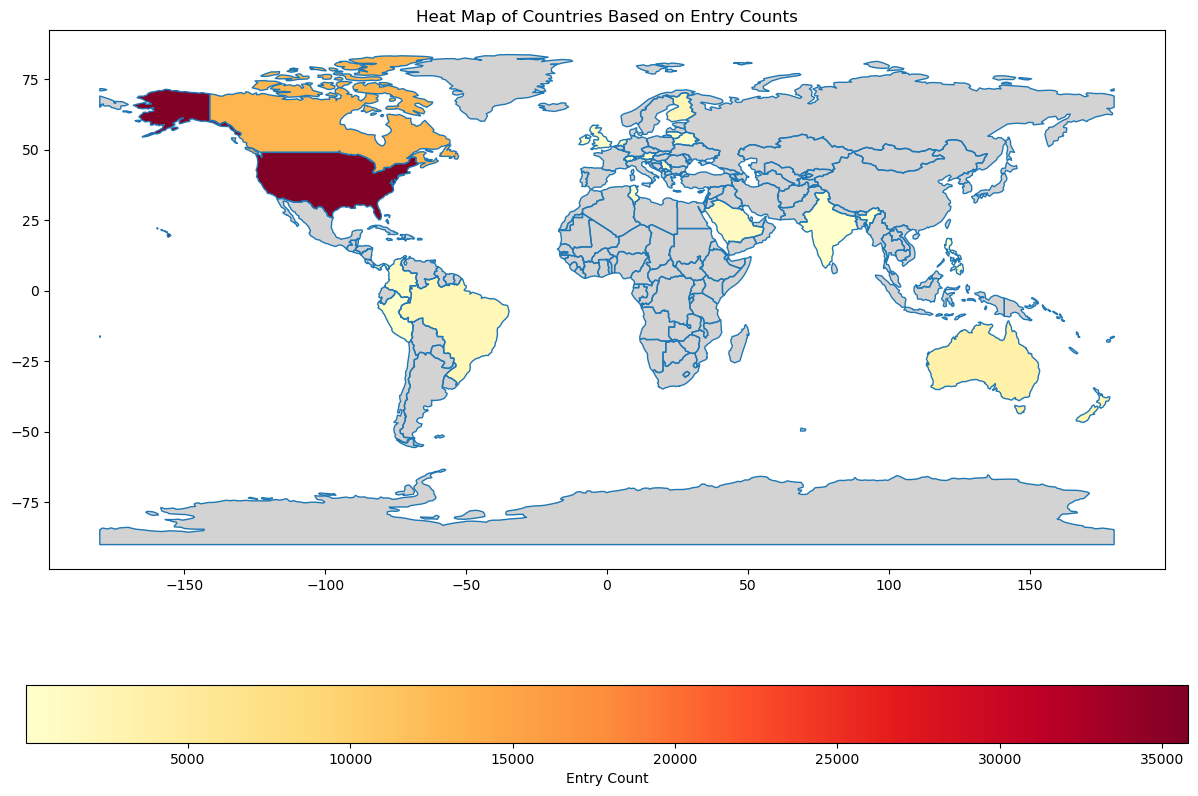

In [23]:
country_counts = final_df['country_x'].value_counts().reset_index()
country_counts.columns = ['Country Code', 'Count']

print(country_counts)

world = gpd.read_file('ne_110m_admin_0_countries.shp')

world = world.rename(columns={'ADM0_A3': 'Country Code'})
world = world.merge(country_counts, on='Country Code', how='left')

world['Count'] = world['Count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

world[world['Count'] > 0].plot(column='Count', ax=ax, legend=True,
                               legend_kwds={'label': "Entry Count",
                                            'orientation': "horizontal"},
                               cmap='YlOrRd')

world[world['Count'] == 0].plot(ax=ax, color='lightgrey', label='Count = 0')

plt.title('Heat Map of Countries Based on Entry Counts')
plt.show()

   Country Code  Count
2           AUS   3558
3           NZL   2465
4           FIN   2246
5           BRA   2209
6           HKG   1480
7           SAU   1230
8           COL   1001
9           SVN    812
10          NLD    728
11          GBR    370
12          LTU    177
13          IRL    142
14          SRB    137
15          CHE    122
16          PER    120
17          PHL    101
18          BLR     23
19          IND     14
20          SLV     13
21          PAN      9
22          AUT      7
23          TUN      6


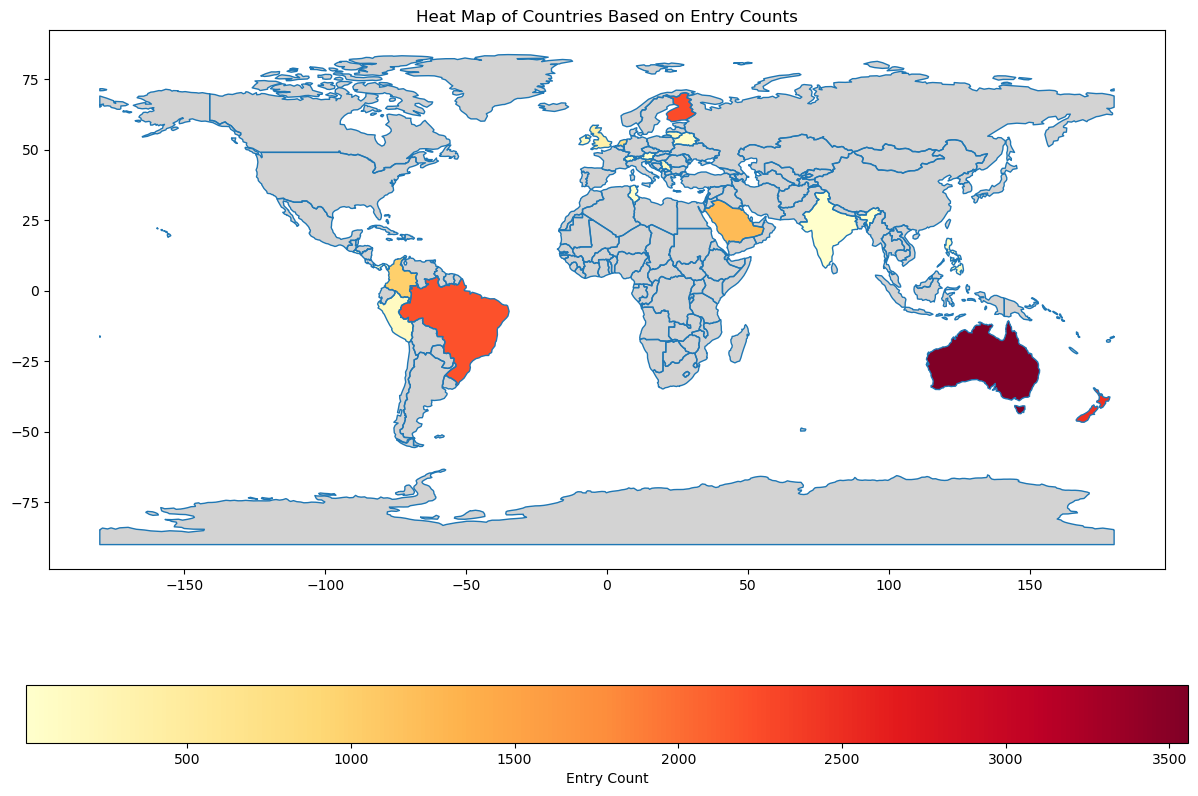

In [24]:
country_counts = final_df['country_x'].value_counts().reset_index()
country_counts.columns = ['Country Code', 'Count']

country_counts_filtered = country_counts[~country_counts['Country Code'].isin(['USA', 'CAN'])]

print(country_counts_filtered)

world = gpd.read_file('ne_110m_admin_0_countries.shp')

world = world.rename(columns={'ADM0_A3': 'Country Code'})
world = world.merge(country_counts_filtered, on='Country Code', how='left')

world['Count'] = world['Count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

world[world['Count'] > 0].plot(column='Count', ax=ax, legend=True,
                               legend_kwds={'label': "Entry Count",
                                            'orientation': "horizontal"},
                               cmap='YlOrRd')

world[world['Count'] == 0].plot(ax=ax, color='lightgrey', label='Count = 0')

plt.title('Heat Map of Countries Based on Entry Counts')
plt.show()